In [4]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [9]:
img_array = cv2.imread("dataset/train/0/Training_10118481.jpg")
img_array.shape

(48, 48, 3)

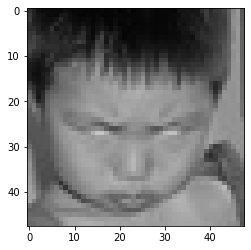

In [11]:
plt.imshow(img_array)

In [13]:
Datadirectory = "dataset/train/"
Classes = ["0", "1", "2", "3", "4", "5", "6"]    #angry, disgust, fear, happy, neutral, sad, surprise

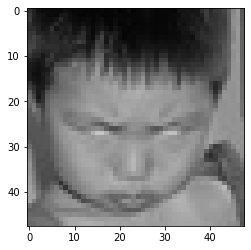

In [14]:
#saving each image in the training dataset
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

# changing the size of the image since imagenet has the size 224 x 224

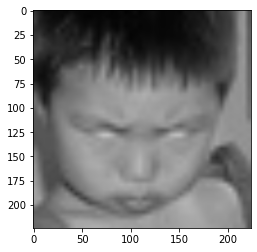

(224, 224, 3)

In [31]:
img_size = 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()
new_array.shape

# Read all the images and converting them to array

In [32]:
training_data = [] #list for training data
def create_training_data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category) #0, 1, 2, 3, 4, 5, 6 #labels
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

In [33]:
create_training_data()

In [34]:
print(len(training_data))

28709


In [35]:
import random
random.shuffle(training_data) #shuffling the data since the model should not know the sequence

In [36]:
X = []
Y = []

for features, label in training_data:
    X.append(features) #array
    Y.append(label) #class_num 0 1 2 3 4 5 6

X = np.array(X).reshape(-1, img_size, img_size, 3) #connverting into 4D -1:end, 
Y = np.array(Y)
X.shape


(28709, 224, 224, 3)

In [ ]:
#normalize the data
X = X/255.0;  #black and white


In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [38]:
model = tf.keras.applications.MobileNetV2() #Pre trained model
model.summary()

14548992/14536120 [==============================] - 5s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
              

In [39]:
#Transfer learning - tuning weights will start from last check point

base_input = model.layers[0].input
base_output = model.layers[-2].output

In [40]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [41]:
##### ACTIVATION FUNCTION


final_output = layers.Dense(128)(base_output) #adding new layer after the output of global pooling layer
final_output = layers.Activation('relu')(final_output) #activation function
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_output) #7 classes #classification layer

In [42]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [43]:
new_model = keras.Model(inputs = base_input, outputs = final_output)
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [45]:
new_model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [46]:
new_model.fit(X, Y, epochs = 25) #training
#for high accuracy increase the epochs

Epoch 1/25
898/898 [==============================] - 2362s 3s/step - loss: 1.2501 - accuracy: 0.5238
Epoch 2/25
898/898 [==============================] - 2377s 3s/step - loss: 1.0734 - accuracy: 0.5989
Epoch 3/25
898/898 [==============================] - 2296s 3s/step - loss: 0.9964 - accuracy: 0.6297
Epoch 4/25
898/898 [==============================] - 2322s 3s/step - loss: 0.9378 - accuracy: 0.6531
Epoch 5/25
898/898 [==============================] - 2414s 3s/step - loss: 0.8851 - accuracy: 0.6724
Epoch 6/25
898/898 [==============================] - 2267s 3s/step - loss: 0.8385 - accuracy: 0.6916
Epoch 7/25
898/898 [==============================] - 2260s 3s/step - loss: 0.7870 - accuracy: 0.7102
Epoch 8/25
898/898 [==============================] - 5884s 7s/step - loss: 0.7419 - accuracy: 0.7265
Epoch 9/25
898/898 [==============================] - 2404s 3s/step - loss: 0.6829 - accuracy: 0.7514
Epoch 10/25
898/898 [==============================] - 2386s 3s/step - loss: 0.636

In [2]:
from tensorflow.keras.models import load_model

new_model.save('model/mod_my_model')

NameError: name 'new_model' is not defined

In [ ]:
new_model = tf.keras.models.load_model('model/mod_my_model') #loading the trained model

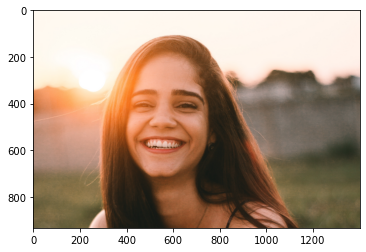

In [48]:
#Test

new_model.evaluate #here we deploy the captured image #for example, let's take an image from outside 'happy.png'


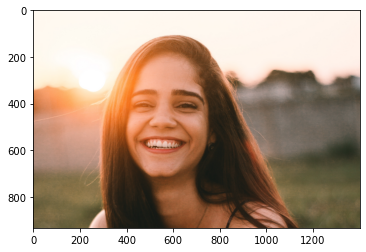

In [49]:
frame = cv2.imread('happy.png')
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [6]:
#need to crop the face from picture
#need face detection algorithm - Haarcascade - works on the gray images
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [7]:
#convert to gray image
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

NameError: name 'frame' is not defined

In [ ]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4)
for x, y, w, h in faces: 
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2) #define rectangle across the boundary of the face
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for(ex, ey, ew, eh) in facess:   #finding all possible faces in the image
            face_roi = roi_color[ey: ey+h, ex: ex+ew]

In [ ]:
#cropped image(Rectange)- having only face
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [ ]:
final_image = cv2.resize(face_roi, (244,244)) #adding 4th dimension
final_image = np.expand_dims(final_image, axis = 0)
final_image = final_image/255.0 #normalizing


In [ ]:
Predictions = new_model.predict(final_image)

In [ ]:
Predictions[0]

In [ ]:
np.argmax(Predictions)  #detected the emotion